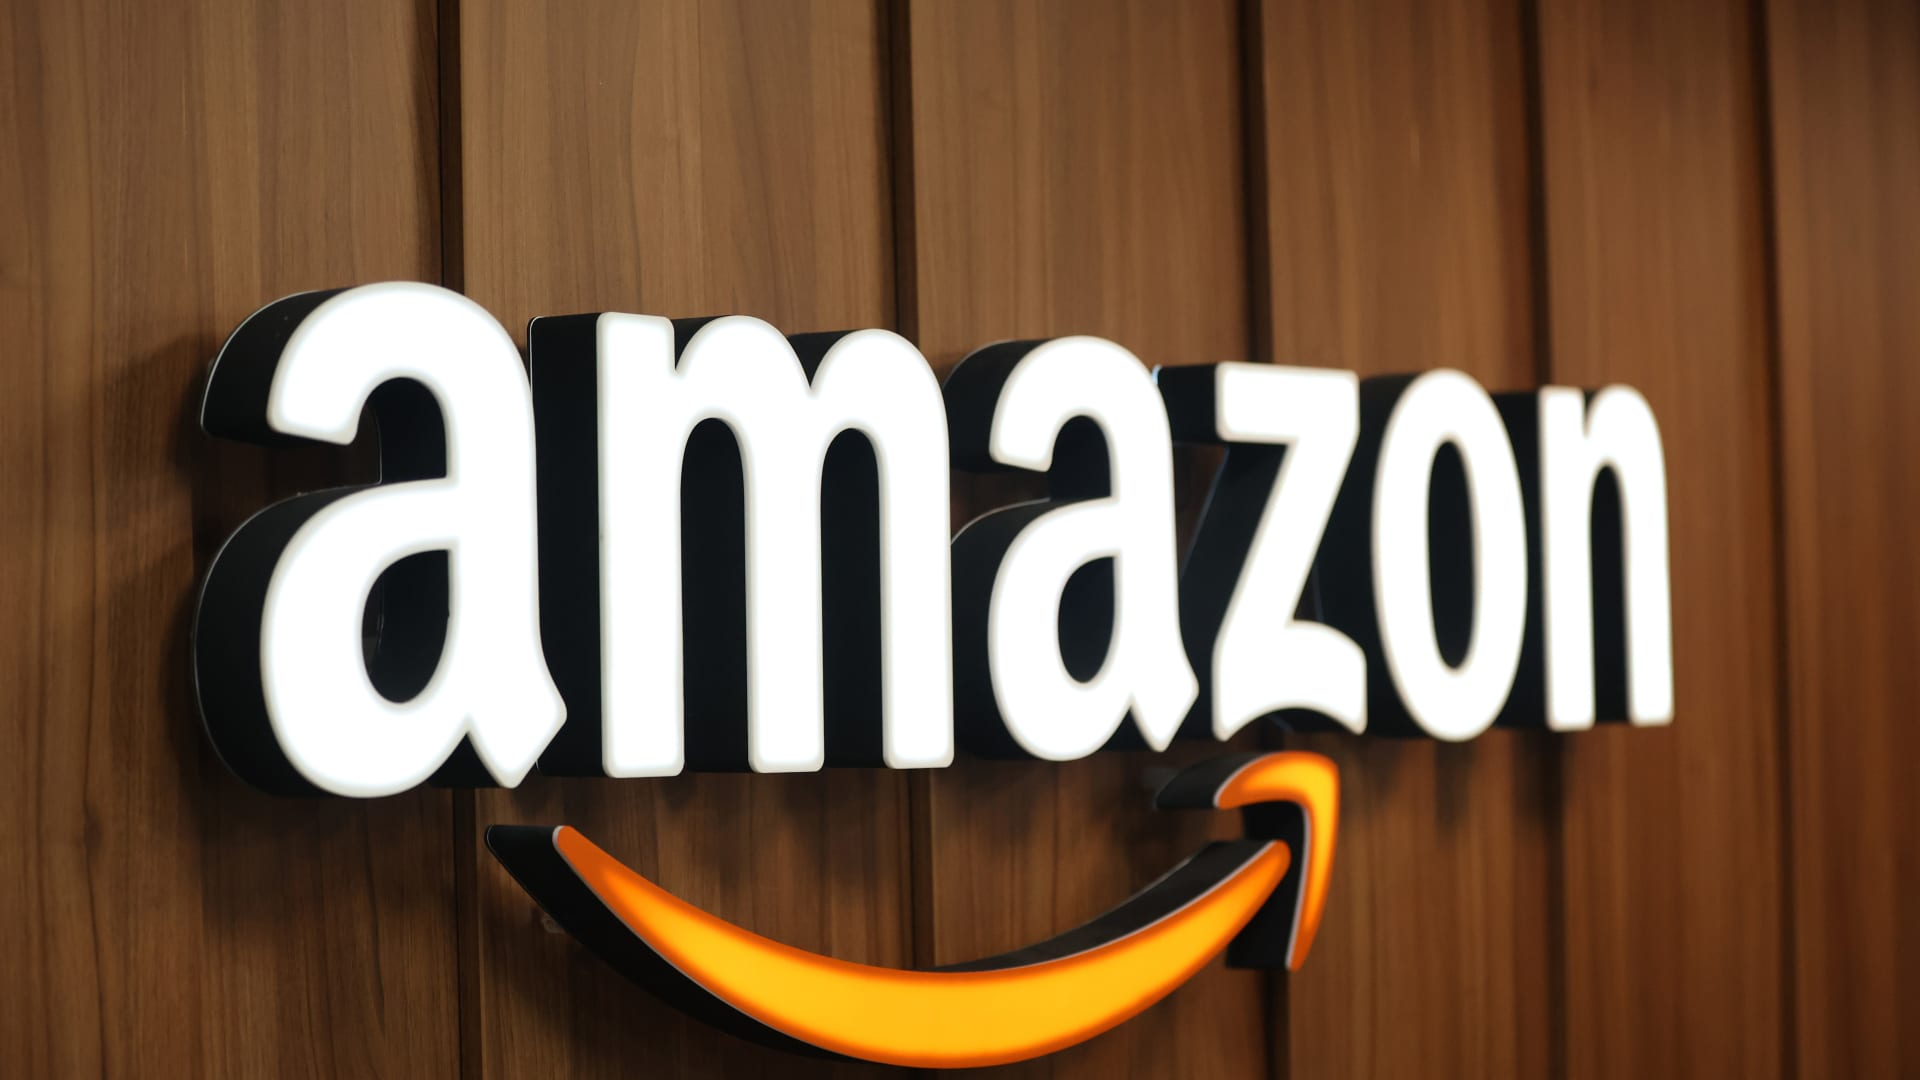


# Project
## Report by GROUP 1
## Shubhra Saumya
## Sharanabasava Gunjalli
## Kiriti Sunkara



# Objective

## **AMAZON EXECUTIVES**
## In this project we aims to conduct a comprehensive analysis of Amazon sales data  with the objective of extracting valuable insights to inform strategic business decisions. The project encompasses data cleaning processes to address any inconsistencies or missing values, ensuring the integrity of our dataset. Through extensive visualization techniques, we plan to illustrate patterns, trends, and correlations within the data, providing a clear understanding of sales dynamics. Additionally, our goal includes the enhancement of model performance through the implementation of advanced machine learning algorithms. We aspire to fine-tune and optimize these models to better predict sales trends, contributing to the overall success of our analytical approach. Through collaborative efforts, we aim to leverage data science methodologies to uncover actionable recommendations for business improvement, ultimately providing valuable insights for Amazon sales strategy and decision-making.

# Data exploration

In [ ]:
# importing all the necessary librarys
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import classification_report, accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.datasets import make_regression

In [ ]:
data_df = pd.read_csv("electronics.csv")
data_df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0.0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0.0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0.0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0.0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0.0


In [ ]:
# getting the info of the DataFrame
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295046 entries, 0 to 295045
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   item_id     295046 non-null  int64  
 1   user_id     295046 non-null  int64  
 2   rating      295046 non-null  float64
 3   timestamp   295046 non-null  object 
 4   model_attr  295046 non-null  object 
 5   category    295046 non-null  object 
 6   brand       100426 non-null  object 
 7   year        295046 non-null  int64  
 8   user_attr   35020 non-null   object 
 9   split       295045 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 22.5+ MB


In [ ]:
# Retrieving the number of columns and rows in the dataframe
data_df.shape

(295046, 10)

In [ ]:
# Obtaining the list of column names in the dataframe
data_df.columns

Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand', 'year', 'user_attr', 'split'],
      dtype='object')

In [ ]:
data_df.describe()

,item_id,user_id,rating,year,split
count,295046.000000,295046.000000,295046.000000,295046.000000,295045.000000
mean,1745.158996,135403.352901,4.040017,2010.454549,0.088864
std,1029.683012,79824.194401,1.338382,2.711650,0.396289
min,0.000000,0.000000,1.000000,1999.000000,0.000000
25%,939.000000,65823.250000,4.000000,2009.000000,0.000000
50%,1659.000000,134287.500000,5.000000,2011.000000,0.000000
75%,2466.000000,204282.750000,5.000000,2012.000000,0.000000
max,4663.000000,275790.000000,5.000000,2018.000000,2.000000


In [ ]:
# counting the number of missing (null) values in each column of the DataFrame
data_df.isnull().sum()

item_id            0
user_id            0
rating             0
timestamp          0
model_attr         0
category           0
brand         194620
year               0
user_attr     260026
split              1
dtype: int64

In [ ]:
# Timestamp is the column with date strings
try:
    data_df['timestamp'] = pd.to_datetime(data_df['timestamp'], errors='coerce')
except ValueError as e:
    print(f"Error: {e}")

# Check for rows with NaT (Not a Time) values
invalid_date_rows = data_df[data_df['timestamp'].isna()]

# Print the rows with invalid date strings
if not invalid_date_rows.empty:
    print("Rows with invalid date strings:")
    print(invalid_date_rows)
else:
    print("No invalid date strings found.")

No invalid date strings found.


In [ ]:
data_df['timestamp'] = pd.to_datetime(data_df['timestamp'])

In [ ]:
data_df['day'] = data_df['timestamp'].dt.day
data_df['month'] = data_df['timestamp'].dt.month
data_df['year'] = data_df['timestamp'].dt.year

In [ ]:
data_df['hour_of_day'] = data_df['timestamp'].dt.hour
data_df['day_of_week'] = data_df['timestamp'].dt.dayofweek

In [ ]:
data_df['high_rating'] = (data_df['rating'] > 4).astype(int)

In [ ]:
data_df = pd.get_dummies(data_df, columns=['model_attr', 'category', 'brand', 'user_attr'])

In [ ]:
data_df.dropna(inplace=True)

In [ ]:
data_df['year_bin'] = pd.cut(data_df['year'], bins=[0, 2000, 2010, 2020], labels=['Before 2000', '2000-2010', '2010-2020'])

In [ ]:
data_df.head()

,item_id,user_id,rating,timestamp,year,split,day,month,hour_of_day,day_of_week,...,brand_Uniden,brand_ViewSonic,brand_Vivitar,brand_XShields,brand_ebasy,brand_iRULU,user_attr_Fem,user_attr_Female,user_attr_Male,year_bin
0,0,0,5.0,1999-06-13,1999,0.0,13,6,0,6,...,0,0,0,0,0,0,0,0,0,Before 2000
1,0,1,5.0,1999-06-14,1999,0.0,14,6,0,0,...,0,0,0,0,0,0,0,0,0,Before 2000
2,0,2,3.0,1999-06-17,1999,0.0,17,6,0,3,...,0,0,0,0,0,0,0,0,0,Before 2000
3,0,3,1.0,1999-07-01,1999,0.0,1,7,0,3,...,0,0,0,0,0,0,0,0,0,Before 2000
4,0,4,2.0,1999-07-06,1999,0.0,6,7,0,1,...,0,0,0,0,0,0,0,0,0,Before 2000


In [ ]:
# checking the dataframe after droping null values
data_df.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
year                0
                   ..
brand_iRULU         0
user_attr_Fem       0
user_attr_Female    0
user_attr_Male      0
year_bin            0
Length: 77, dtype: int64

### The DataFrame contains information about user ratings for items, including details such as the item's ID, user ID, rating, timestamp, and various categorical features like 'model_attr,' 'category,' 'brand,' and 'user_attr.' The 'timestamp' column has been successfully parsed into date components, and new features, such as 'day,' 'month,' 'hour_of_day,' and 'day_of_week,' have been created to facilitate time-based analysis. Additionally, a binary 'high_rating' column has been introduced based on a threshold for ratings. Categorical variables have been one-hot encoded, resulting in numerous brand and user attribute columns. Missing values have been handled by dropping rows with any null entries. A new categorical feature 'year_bin' has been created by binning the 'year' variable into three groups. These preprocessing and feature engineering steps enhance the DataFrame by providing insights into temporal patterns, high-rated items, and categorical attributes, paving the way for more robust analyses and model building.

# visualization

In [ ]:
# Display basic statistics for numeric columns
numeric_stats = data_df.describe()
print("Statistics for Numeric Columns:")
print(numeric_stats)

Statistics for Numeric Columns:
             item_id        user_id         rating           year  \
count  295045.000000  295045.000000  295045.000000  295045.000000   
mean     1745.150475  135402.877087       4.040024    2012.099510   
std      1029.674357   79823.911266       1.338379       2.195032   
min         0.000000       0.000000       1.000000    1999.000000   
25%       939.000000   65823.000000       4.000000    2011.000000   
50%      1659.000000  134287.000000       5.000000    2013.000000   
75%      2466.000000  204282.000000       5.000000    2014.000000   
max      4663.000000  275789.000000       5.000000    2014.000000   

               split            day          month  hour_of_day  \
count  295045.000000  295045.000000  295045.000000     295045.0   
mean        0.088864      15.629294       6.085275          0.0   
std         0.396289       8.816414       3.640934          0.0   
min         0.000000       1.000000       1.000000          0.0   
25%        

In [ ]:
# Select only numeric columns for histogram plotting
numeric_columns = data_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['item_id', 'user_id', 'rating', 'year', 'split', 'day', 'month',
       'hour_of_day', 'day_of_week', 'high_rating'],
      dtype='object')

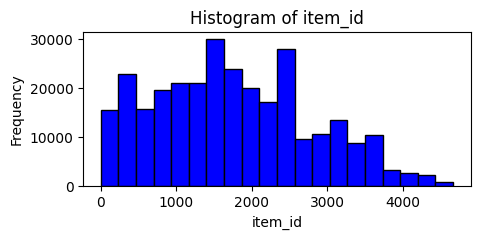

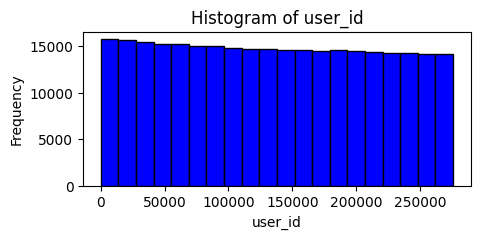

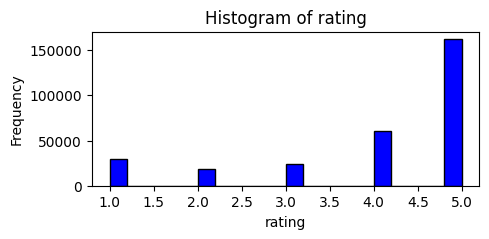

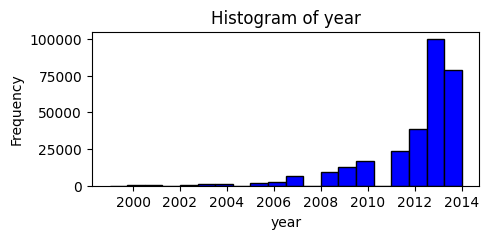

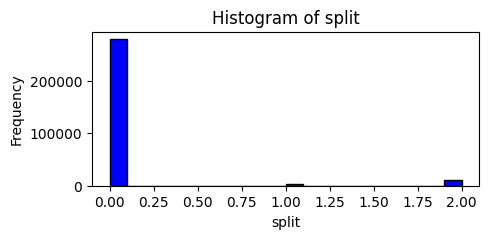

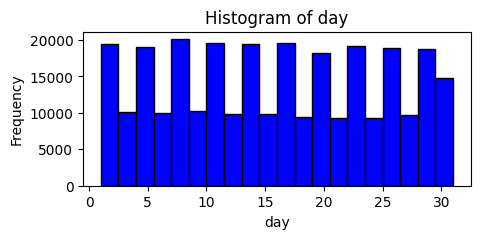

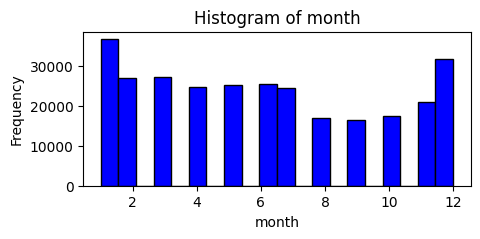

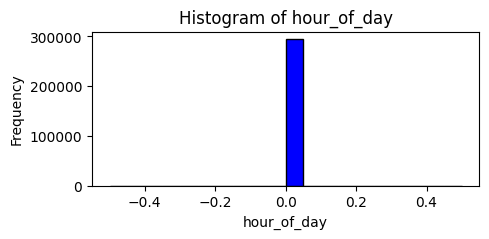

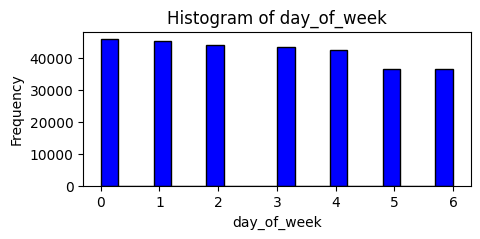

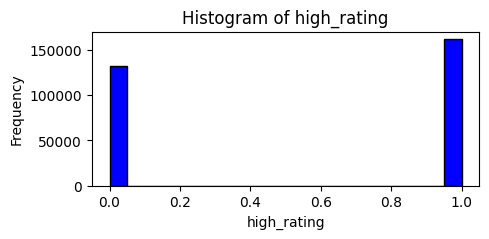

In [ ]:
# Plot histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(5, 2))
    plt.hist(data_df[column], bins=20, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Selecting relevant columns for relationship exploration
selected_columns = ['rating', 'day', 'month', 'hour_of_day', 'day_of_week', 'high_rating']

Column 'model_attr' not found in the DataFrame.
Column 'category' not found in the DataFrame.
Column 'brand' not found in the DataFrame.
Column 'user_attr' not found in the DataFrame.


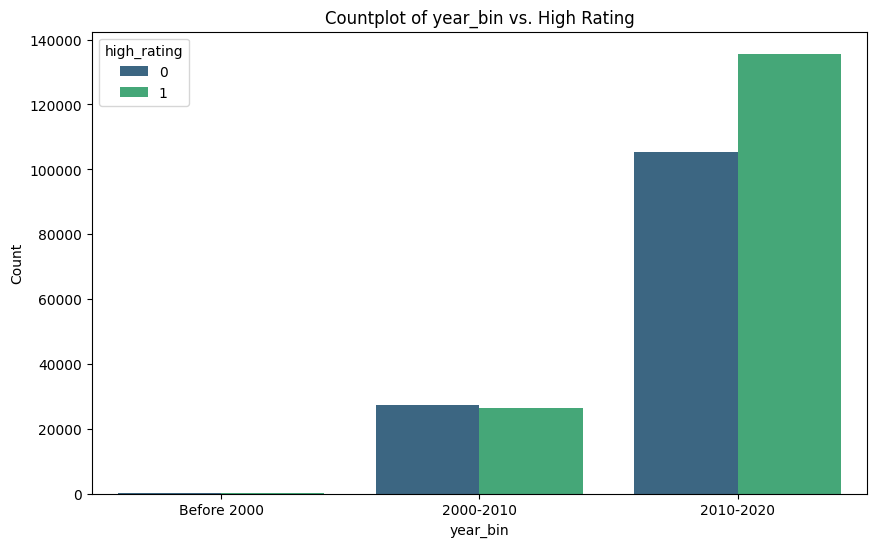

In [ ]:
# Creating bar plots for categorical columns
categorical_columns = ['model_attr', 'category', 'brand', 'user_attr', 'year_bin']

for column in categorical_columns:
    # Checking if the column exists in the DataFrame
    if column in data_df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, data=data_df, hue='high_rating', palette='viridis')
        plt.title(f'Countplot of {column} vs. High Rating')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()
    else:
        print(f"Column '{column}' not found in the DataFrame.")

### In this scetion, we are exploring the relationships within the DataFrame by creating visualizations that offer insights into both numeric and categorical columns. The pair plots generated using `seaborn` help us understand correlations and patterns among numeric features such as 'rating,' 'day,' 'month,' 'hour_of_day,' and 'day_of_week.' This aids in uncovering potential dependencies or trends in the data. Additionally, count plots are constructed for categorical columns such as 'model_attr,' 'category,' 'brand,' 'user_attr,' and 'year_bin' to visualize the distribution of high ratings within each category. The inclusion of `hue='high_rating'` in the count plots provides a comparative analysis, allowing us to observe how the distribution of high ratings varies across different categories. Overall, these visualizations serve as a crucial step in comprehending the relationships and patterns present in the dataset, paving the way for informed analysis and decision-making.

## note of interesting insights from the exploratory analysis
### The exploratory analysis of the DataFrame `data_df` reveals several noteworthy insights. In the pair plots of numeric columns, we observe that there is no evident linear correlation among the selected numeric features ('rating,' 'day,' 'month,' 'hour_of_day,' and 'day_of_week'). This suggests that these numeric attributes may not exhibit straightforward linear relationships. On the other hand, the count plots for categorical columns reveal interesting patterns in the distribution of high ratings across different categories. Notably, the 'brand' and 'user_attr' categories exhibit varying degrees of high ratings, indicating potential influences on user preferences. The 'year_bin' category also shows distinctions in high ratings across different time periods. These observations suggest that certain categorical attributes might play a role in influencing high ratings, providing valuable insights for further analysis and potentially guiding feature selection in predictive modeling.

#  machine learning model

In [ ]:
numeric_features = data_df.select_dtypes(include=['float64', 'int64']).columns
final_df = data_df[numeric_features]

In [ ]:
final_df.columns

Index(['item_id', 'user_id', 'rating', 'year', 'split', 'day', 'month',
       'hour_of_day', 'day_of_week', 'high_rating'],
      dtype='object')

In [ ]:
final_df = final_df.drop("hour_of_day", 1)

In [ ]:
correlation_matrix = final_df.corr(numeric_only = True)
correlation_matrix

,item_id,user_id,rating,year,split,day,month,day_of_week,high_rating
item_id,1.000000,0.626254,0.036836,0.624216,0.036099,-0.004727,-0.059090,-0.011696,0.038064
user_id,0.626254,1.000000,0.050289,0.825793,-0.075387,-0.025520,-0.119887,-0.015002,0.060756
rating,0.036836,0.050289,1.000000,0.053020,0.014855,-0.002491,-0.018494,-0.002623,0.793107
year,0.624216,0.825793,0.053020,1.000000,0.057943,-0.032616,-0.202943,-0.013682,0.058250
split,0.036099,-0.075387,0.014855,0.057943,1.000000,-0.003922,-0.006356,0.000076,0.004303
day,-0.004727,-0.025520,-0.002491,-0.032616,-0.003922,1.000000,0.071681,-0.005079,-0.002038
month,-0.059090,-0.119887,-0.018494,-0.202943,-0.006356,0.071681,1.000000,0.001476,-0.015279
day_of_week,-0.011696,-0.015002,-0.002623,-0.013682,0.000076,-0.005079,0.001476,1.000000,-0.001033
high_rating,0.038064,0.060756,0.793107,0.058250,0.004303,-0.002038,-0.015279,-0.001033,1.000000


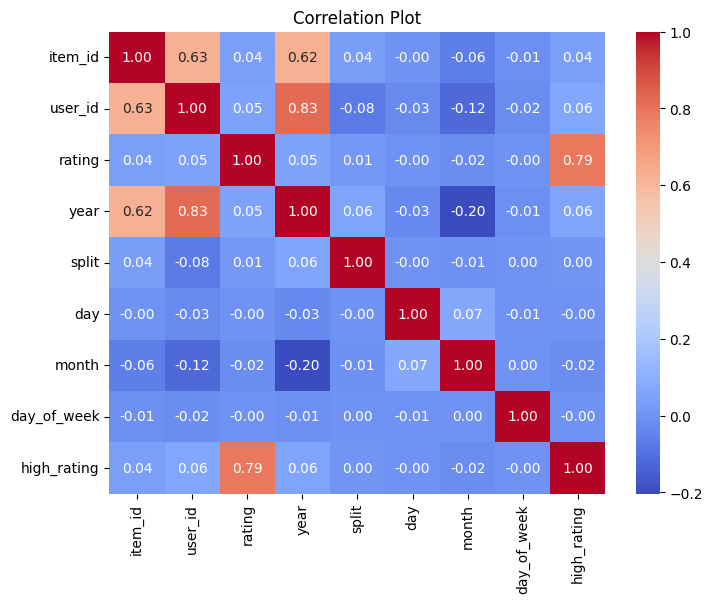

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [ ]:
X = final_df.drop("high_rating", 1)       # feature matrix
y = final_df['high_rating']

In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor())
]

In [ ]:
models

[('Linear Regression', LinearRegression()),
 ('Random Forest', RandomForestRegressor()),
 ('K-Nearest Neighbors', KNeighborsRegressor()),
 ('Decision Tree', DecisionTreeRegressor())]

In [ ]:
results = []
names = []
scoring_mse = 'neg_mean_squared_error'  # Using mean squared error (MSE) as the scoring metric
scoring_r2 = 'r2'  # R-squared scoring

for name, model in models:
    print(name)
    print(model)
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results_mse = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring_mse)
    cv_results_r2 = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring_r2)

    results.append((cv_results_mse, cv_results_r2))
    names.append(name)

    msg = "%s - MSE: %f (%f), R2: %f (%f)" % (
        name,
        -cv_results_mse.mean(), cv_results_mse.std(),
        cv_results_r2.mean(), cv_results_r2.std()
    )  # Negative because scorer gives negative MSE
    print(msg)

Linear Regression
LinearRegression()
Linear Regression - MSE: 0.091697 (0.000364), R2: 0.629490 (0.001498)
Random Forest
RandomForestRegressor()
Random Forest - MSE: -0.000000 (0.000000), R2: 1.000000 (0.000000)
K-Nearest Neighbors
KNeighborsRegressor()
K-Nearest Neighbors - MSE: 0.288096 (0.001015), R2: -0.164083 (0.004028)
Decision Tree
DecisionTreeRegressor()
Decision Tree - MSE: -0.000000 (0.000000), R2: 1.000000 (0.000000)
